# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [1]:
import numpy as np

## Define a function that creates some statistical data

In [2]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))
    return positions, heights

## Read the data

In [3]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [4]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [5]:
len(positions),len(heights)

(100, 100)

## Convert to numpy arrays

In [6]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [7]:
print(np_positions.dtype, np_positions.shape) #<U2 is a unicode string of two characters
print(np_heights.dtype, np_heights.shape)

<U2 (100,)
float64 (100,)


## Extract the heights of the goalkeepers

In [8]:
gk_heights = np_heights[np_positions == 'GK']

## Print the median of the goalkeepers heights

In [9]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 182.2452361627461


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [10]:
#Median height of all field players
field_heights = np_heights[np_positions != "GK"]
print("Median height of all the field players: " + str(np.median(field_heights)))

#Median height of the attackers
a_heights = np_heights[np_positions == 'A']
print("Median height of all the field attackers: " + str(np.median(a_heights)))

#Median height of goalkeepers and the attackers combined
gk_a_heights = np.append(gk_heights, a_heights)
print("Median height of goalkeepers and the attackers combined: " + str(np.median(gk_a_heights)))

Median height of all the field players: 180.2593079189324
Median height of all the field attackers: 180.33616154338915
Median height of goalkeepers and the attackers combined: 181.48667424262092


## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [11]:
#Shortest player
min_pos = np_positions[np.where(np_heights == np.min(np_heights))]
min_pos

array(['GK'], dtype='<U2')

In [12]:
np.where(np_heights == np.min(np_heights)) #shows in which index of the array is the minimum value; 
#than np_position converts the index into the corresponding player tag

(array([10], dtype=int64),)

In [13]:
#Check shortest player
print("Min height of goalkeepers: " + str(np.min(gk_heights)))
print("Min height of attackers: " + str(np.min(a_heights)))
#Defenders
d_heights = np_heights[np_positions == 'D']
print("Min height of defenders: " + str(np.min(d_heights)))
#Midfielders
m_heights = np_heights[np_positions == 'M']
print("Min height of midfielders: " + str(np.min(m_heights)))

Min height of goalkeepers: 167.67139936379763
Min height of attackers: 171.2551535278587
Min height of defenders: 171.58575539116623
Min height of midfielders: 168.9125666848801


In [14]:
#Tallest player
max_pos = np_positions[np.where(np_heights == np.max(np_heights))]
max_pos

array(['A'], dtype='<U2')

In [15]:
#Check tallest player
print("Max height of goalkeepers: " + str(np.max(gk_heights)))
print("Max height of attackers: " + str(np.max(a_heights)))
print("Max height of defenders: " + str(np.max(d_heights)))
print("Max height of midfielders: " + str(np.max(m_heights)))

Max height of goalkeepers: 190.89650742724916
Max height of attackers: 194.55464470785452
Max height of defenders: 191.26602171852207
Max height of midfielders: 188.93798225732598


## Data plotting

For plotting, we need the package matplotlib

In [16]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [17]:
# For inline plots use
%matplotlib inline

In [18]:
# For inline plots with interactive capabilities use
%matplotlib notebook

Lets visualize the height distribution of the defenders

In [19]:
d_heights = np_heights[np_positions == 'D']

<IPython.core.display.Javascript object>


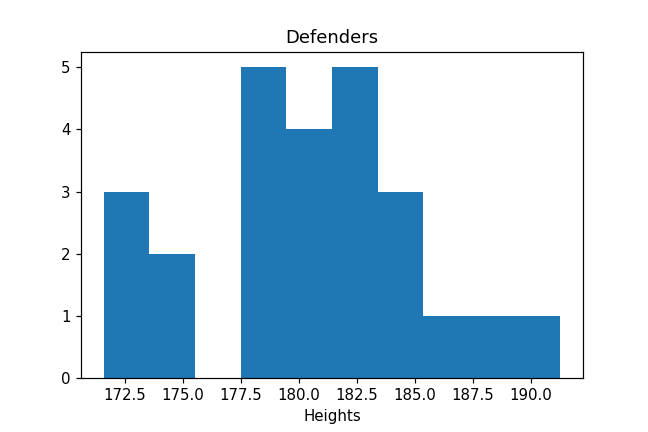

In [20]:
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can plot the max/min within each position

In [21]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

<IPython.core.display.Javascript object>


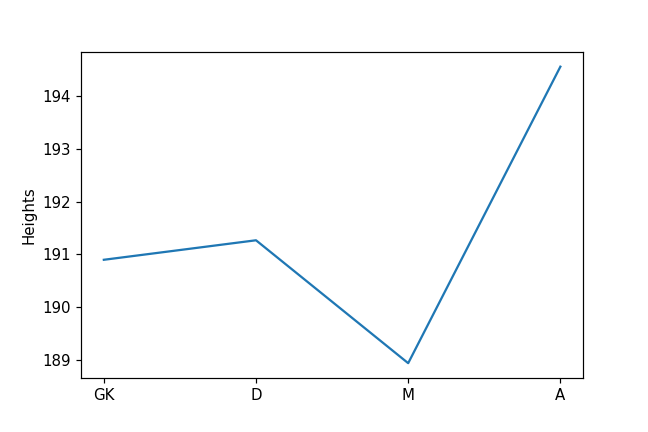

In [22]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)

<IPython.core.display.Javascript object>


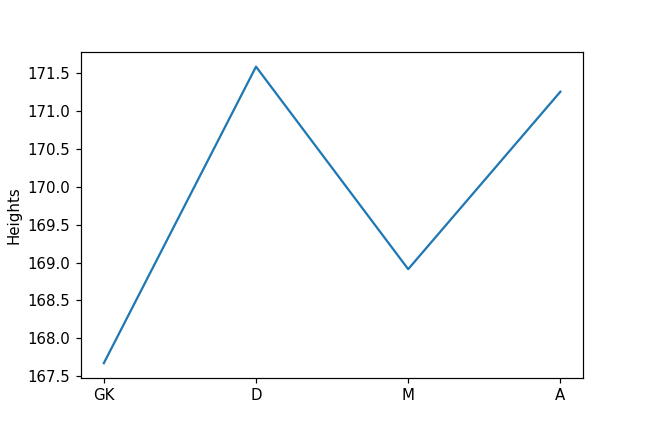

In [24]:
#Shortest player
p = ['GK', 'D', 'M', 'A']
p_min = [np_heights[np_positions == i].min() for i in p]

plt.figure()
plt.plot(range(len(p)), p_min)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()